# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.620  1  1.158 0.283 0.006   
                             age        0.040  1  0.075 0.784 0.000   
                             Kiel       1.831  1  3.419 0.066 0.018   
                             Magdeburg  4.577  1  8.545 0.004 0.043   
                             Sweden     8.021  1 14.976 0.000 0.073   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.358  1  0.432 0.512 0.002   
                             age        0.966  1  1.165 0.282 0.006   
                             Kiel       0.000  1  0.000 0.983 0.000   
                             Magdeburg  1.080  1  1.303 0.255 0.007   
                             Sweden    11.880  1 14.324 0.000 0.070   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.548  0.442    False  
                             age               0.106  0.870    False  
                             Kiel              1.181  0.152    False  
                             Magdeburg         2.411  0.016     True  
                             Sweden            3.826  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.291  0.657    False  
                             age               0.550  0.440    False  
                             Kiel              0.008  0.991    False  
                             Magdeburg         0.593  0.412    False  
                             Sweden            3.686  0.001     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.675  1  4.400 0.037 0.023   
                             age        0.011  1  0.072 0.789 0.000   
                             Kiel       0.391  1  2.548 0.112 0.013   
                             Magdeburg  0.887  1  5.784 0.017 0.029   
                             Sweden     2.362  1 15.394 0.000 0.075   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.523  1  0.828 0.364 0.004   
                             age        0.854  1  0.464 0.496 0.002   
                             Kiel       9.191  1  4.997 0.027 0.025   
                             Magdeburg 16.725  1  9.093 0.003 0.045   
                             Sweden     0.500  1  0.272 0.603 0.001   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.429  0.089    False  
                             age               0.103  0.864    False  
                             Kiel              0.951  0.216    False  
                             Magdeburg         1.766  0.048     True  
                             Sweden            3.915  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.439  0.512    False  
                             age               0.304  0.634    False  
                             Kiel              1.576  0.069    False  
                             Magdeburg         2.535  0.011     True  
                             Sweden            0.220  0.723    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.283         0.548  0.442    False   
                             age       0.784         0.106  0.870    False   
                             Kiel      0.066         1.181  0.152    False   
                             Magdeburg 0.004         2.411  0.016     True   
                             Sweden    0.000         3.826  0.001     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.512         0.291  0.657    False   
                             age       0.282         0.550  0.440    False   
                             Kiel      0.983         0.008  0.991    False   
                             Magdeburg 0.255         0.593  0.412    False   
                             Sweden    0.000         3.686  0.001     True   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.037         1.429  0.089    False  
                             age       0.789         0.103  0.864    False  
                             Kiel      0.112         0.951  0.216    False  
                             Magdeburg 0.017         1.766  0.048     True  
                             Sweden    0.000         3.915  0.001     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.364         0.439  0.512    False  
                             age       0.496         0.304  0.634    False  
                             Kiel      0.027         1.576  0.069    False  
                             Magdeburg 0.003         2.535  0.011     True  
                             Sweden    0.603         0.220  0.723    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.259         2.475     0.335     0.245         2.744     0.311
std       0.302         5.295     0.329     0.298         5.174     0.325
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.340     0.016     0.002         0.368     0.008
50%       0.121         0.916     0.243     0.093         1.031     0.186
75%       0.457         2.411     0.609     0.429         2.722     0.572
max       1.000       146.265     1.000     0.999        85.122     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.283         0.548   
A0A024R0T9;K7ER74;P02655                           AD     0.042         1.379   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.094         1.027   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.600         0.222   
A0A075B6H7                                         AD     0.171         0.768   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.104         0.982   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.215         0.667   
S4R3U6                                             AD     0.512         0.291   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.442    False   
A0A024R0T9;K7ER74;P02655                           AD      0.106    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.201    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.730    False   
A0A075B6H7                                         AD      0.309    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.316    False   
Q9Y6X5                                             AD      0.217    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.183    False   
Q9Y6Y9                                             AD      0.365    False   
S4R3U6                                             AD      0.657    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.037         1.429   
A0A024R0T9;K7ER74;P02655                           AD     0.032         1.493   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.299         0.525   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.301         0.522   
A0A075B6H7                                         AD     0.174         0.759   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.092         1.036   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.954         0.020   
S4R3U6                                             AD     0.364         0.439   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.089    False  
A0A024R0T9;K7ER74;P02655                           AD      0.080    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.447    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.449    False  
A0A075B6H7                                         AD      0.302    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.252         1.401     0.335     0.245         1.491     0.319
std       0.289         1.656     0.314     0.286         1.788     0.312
min       0.000         0.000     0.000     0.000         0.003     0.000
25%       0.013         0.364     0.041     0.010         0.375     0.030
50%       0.124         0.905     0.247     0.111         0.954     0.215
75%       0.432         1.893     0.590     0.422         2.013     0.565
max       0.999        25.350     1.000     0.994        26.558     0.996

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1033,995


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.283         0.548  0.442   
A0A024R0T9;K7ER74;P02655                           0.042         1.379  0.106   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.094         1.027  0.201   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.600         0.222  0.730   
A0A075B6H7                                         0.171         0.768  0.309   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.316   
Q9Y6X5                                             0.104         0.982  0.217   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.183   
Q9Y6Y9                                             0.215         0.667  0.365   
S4R3U6                                             0.512         0.291  0.657   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.037   
A0A024R0T9;K7ER74;P02655                              False 0.032   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.299   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.301   
A0A075B6H7                                            False 0.174   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.092   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.954   
S4R3U6                                                False 0.364   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.429  0.089   
A0A024R0T9;K7ER74;P02655                                   1.493  0.080   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.525  0.447   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.522  0.449   
A0A075B6H7                                                 0.759  0.302   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.304   
Q9Y6X5                                                     1.036  0.185   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.171   
Q9Y6Y9                                                     0.020  0.972   
S4R3U6                                                     0.439  0.512   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    962
PI (yes) - QRILC (yes)   355
PI (no)  - QRILC (yes)    71
PI (yes) - QRILC (no)     33
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


PI                                \
                                         p-unc -Log10 pvalue qvalue rejected   
protein groups                                                                 
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2    0.006         2.241  0.021     True   
A0A087WWT2;Q9NPD7                        0.026         1.582  0.074    False   
A0A087X152;D6RE16;E0CX15;O95185;O95185-2 0.012         1.936  0.038     True   
A0A087X1G7;A0A0B4J1S4;O60613             0.019         1.730  0.056    False   
A0A087X1V2                               0.058         1.235  0.138    False   
...                                        ...           ...    ...      ...   
Q9NYX4                                   0.058         1.239  0.137    False   
Q9P0K9                                   0.018         1.750  0.054    False   
Q9ULP0-3;Q9ULP0-6                        0.010         1.990  0.034     True   
Q9UNW1                                   0.015         1.834  0.046     True   
Q9UQ52                                   0.088         1.055  0.191    False   

                                         QRILC                                \
                                         p-unc -Log10 pvalue qvalue rejected   
protein groups                                                                 
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2    0.141         0.851  0.256    False   
A0A087WWT2;Q9NPD7                        0.006         2.255  0.019     True   
A0A087X152;D6RE16;E0CX15;O95185;O95185-2 0.038         1.421  0.091    False   
A0A087X1G7;A0A0B4J1S4;O60613             0.013         1.894  0.038     True   
A0A087X1V2                               0.016         1.807  0.045     True   
...                                        ...           ...    ...      ...   
Q9NYX4                                   0.007         2.163  0.023     True   
Q9P0K9                                   0.011         1.965  0.033     True   
Q9ULP0-3;Q9ULP0-6                        0.033         1.480  0.081    False   
Q9UNW1                                   0.151         0.822  0.270    False   
Q9UQ52                                   0.005         2.306  0.017     True   

                                              data  
                                         frequency  
protein groups                                      
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2          114  
A0A087WWT2;Q9NPD7                              193  
A0A087X152;D6RE16;E0CX15;O95185;O95185-2       176  
A0A087X1G7;A0A0B4J1S4;O60613                   184  
A0A087X1V2                                     178  
...                                            ...  
Q9NYX4                                         195  
Q9P0K9                                         192  
Q9ULP0-3;Q9ULP0-6                              136  
Q9UNW1                                         171  
Q9UQ52                                         188  

[104 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.442,0.089,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.106,0.080,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.201,0.447,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.730,0.449,196,PI (no) - QRILC (no)
A0A075B6H7,0.309,0.302,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.316,0.304,197,PI (no) - QRILC (no)
Q9Y6X5,0.217,0.185,173,PI (no) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.183,0.171,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
P43004;P43004-2;P43004-3,0.962,0.047,89,PI (no) - QRILC (yes),0.914
P63167;Q96FJ2,0.820,0.004,137,PI (no) - QRILC (yes),0.817
A0A0C4DH31,0.862,0.048,52,PI (no) - QRILC (yes),0.814
F5H423;P61204;P84077,0.032,0.681,131,PI (yes) - QRILC (no),0.649
A8MZH3;E9PJ72;E9PMR5;H0YEA2;H0YF02;H7BYR8;J3QKL5;J3QL64;J3QQK6;P02686;P02686-3;P02686-4;P02686-5;P02686-6,0.484,0.000,132,PI (no) - QRILC (yes),0.483
...,...,...,...,...,...
H0Y4H1,0.053,0.038,117,PI (no) - QRILC (yes),0.015
K7ERI9;P02654,0.042,0.054,196,PI (yes) - QRILC (no),0.012
Q16706,0.051,0.044,195,PI (no) - QRILC (yes),0.007


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


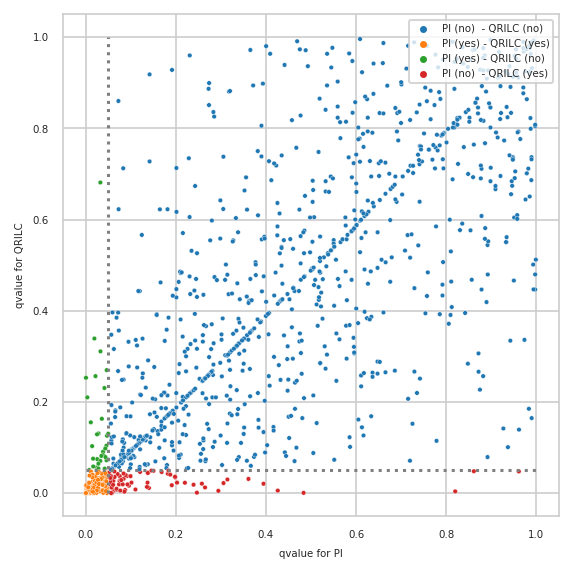

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


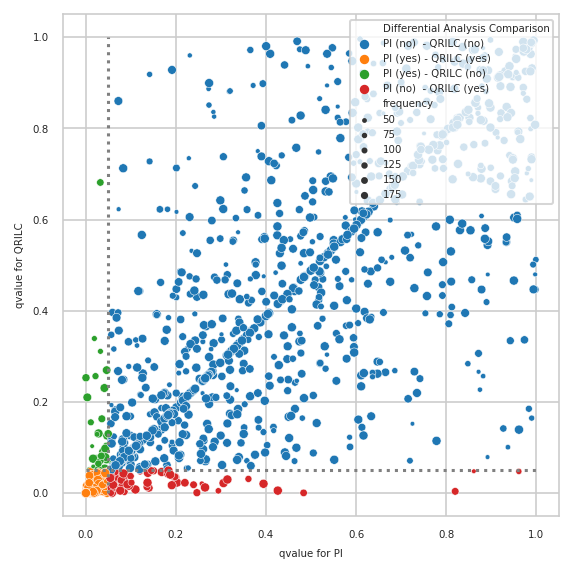

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
CLU,ENSP00000315130,4.263
...,...,...
HBS1L,ENSP00000356811,0.508
SMAD9,ENSP00000369154,0.506
ANKRD11,ENSP00000301030,0.506


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/usr/share/miniconda3/envs/vaep/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out